

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://huggingface.co/docs/transformers/index
* https://huggingface.co/docs/transformers/main_classes/pipelines
* https://huggingface.co/docs/transformers/preprocessing
* https://habr.com/ru/articles/704592/
* https://lightning.ai/docs/torchmetrics/stable/text/bleu_score.html

1\. Обсудите основные возможности и экосистему пакета 🤗 Transformers на примере задачи поиска ответа на вопрос в тексте.

In [1]:
text = """The seminars on Deep Learning and Natural Language Processing were truly captivating,
providing a deep dive into the intricacies of these disciplines.
The wealth of knowledge and insights gained during the sessions was commendable.
However, it's disheartening to note the scarcity of homework assignments.
Anastasia, in particular, is quite concerned that the limited number of assignments might
fall short of even reaching 30. While the seminars were intellectually stimulating,
the desire for more hands-on practice through assignments remains strong,
as it is crucial for reinforcing the theoretical understanding acquired during the classes."""

In [2]:
question1 = "What would be the ideal number of homework assignments for Anastasia"
question2 = "What are the shortcomings of the course?"

In [3]:
from transformers import pipeline

In [4]:
answerer = pipeline(
    "question-answering",
    model="distilbert/distilbert-base-uncased-distilled-squad"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
answerer(question=question1, context=text)

{'score': 0.8874248266220093, 'start': 424, 'end': 426, 'answer': '30'}

In [8]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

In [9]:
model_name = "distilbert/distilbert-base-uncased-distilled-squad"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
inputs = tokenizer(question1, text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  2054,  2052,  2022,  1996,  7812,  2193,  1997, 19453, 14799,
          2005, 19447,   102,  1996, 17239,  2006,  2784,  4083,  1998,  3019,
          2653,  6364,  2020,  5621, 14408, 17441,  1010,  4346,  1037,  2784,
         11529,  2046,  1996, 20014, 14735,  9243,  1997,  2122, 12736,  1012,
          1996,  7177,  1997,  3716,  1998, 20062,  4227,  2076,  1996,  6521,
          2001,  4012,  3549, 20782,  1012,  2174,  1010,  2009,  1005,  1055,
          9841, 14644,  6528,  2075,  2000,  3602,  1996, 11228, 12972,  1997,
         19453, 14799,  1012, 19447,  1010,  1999,  3327,  1010,  2003,  3243,
          4986,  2008,  1996,  3132,  2193,  1997, 14799,  2453,  2991,  2460,
          1997,  2130,  4285,  2382,  1012,  2096,  1996, 17239,  2020,  7789,
          2135, 27295,  1010,  1996,  4792,  2005,  2062,  2398,  1011,  2006,
          3218,  2083, 14799,  3464,  2844,  1010,  2004,  2009,  2003, 10232,
          2005, 27788, 29278,  6129,  

In [15]:
with torch.no_grad():
  outputs = model(**inputs)

In [18]:
ans_start = outputs.start_logits.argmax()
ans_end = outputs.end_logits.argmax()
ans_end

tensor(93)

In [21]:
token_ids = inputs["input_ids"][0][ans_start: ans_end+1]
tokens = tokenizer.convert_ids_to_tokens(token_ids)
tokenizer.convert_tokens_to_string(tokens)

'30'

<p class="task" id="1"></p>

1\. Среди предобученных моделей найдите модель для перевода текста с русского языка на английский. Протестируйте данную модель на нескольких предложениях, используя `transformers.pipeline`. Выведите результаты работы в следующем виде:

```
sentence1_ru -> sentence1_en
sentence2_ru -> sentence2_en
```

Получите перевод для всех текстов из файла `RuBQ_2.0_test.json` и посчитайте BLEU-score.

- [ ] Проверено на семинаре

In [1]:
from transformers import pipeline
import torch as th
from sacrebleu import corpus_bleu
import json

device = 0 if th.cuda.is_available() else -1
device

0

In [2]:
translator  = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-ru-en",
    device=device
)

In [3]:
sentences = [
    "Блажен, кто с смолоду был молод, Блажен, кто вовремя созрел",
    "Мы почитаем всех нулями, А единицами — себя",
    "Чем меньше женщину мы любим, Тем легче нравимся мы ей",
    "Мы все учились понемногу Чему-нибудь и как-нибудь",
]

for sentence in sentences:
    translation = translator(sentence)[0]['translation_text']
    print(f"{sentence} -> {translation}")

Блажен, кто с смолоду был молод, Блажен, кто вовремя созрел -> Happy Who Was Young With the Smooth, Bliss Who Is Full of Time
Мы почитаем всех нулями, А единицами — себя -> We honor them all with zeros, and we honor ourselves with units.
Чем меньше женщину мы любим, Тем легче нравимся мы ей -> The less a woman we love, the easier she likes us.
Мы все учились понемногу Чему-нибудь и как-нибудь -> We've all been studying a little something sometime.


In [ ]:
with open('RuBQ_2.0_test.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

russian_questions = [item['question_text'] for item in data]
english_translations = [item['question_eng'] for item in data]

translated_texts = [translator(question)[0]['translation_text'] for question in russian_questions]

bleu_score = corpus_bleu(translated_texts, [english_translations])
print(f"BLEU Score: {bleu_score.score}")

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


BLEU Score: 38.579550988105765


<p class="task" id="2"></p>

2\. Среди предобученных моделей найдите модель для классификации фотографий людей по полу.

Протестируйте данную модель на нескольких фотографиях, используя `AutoFeatureExtractor` и `AutoModelForImageClassification`.

Выведите на экран сетку 2х2 из изображений, где над каждым изображением добавлена подпись, содержащая прогноз модели и правильный ответ.

- [ ] Проверено на семинаре

In [1]:
import torch
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model_name = "rizvandwiki/gender-classification"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


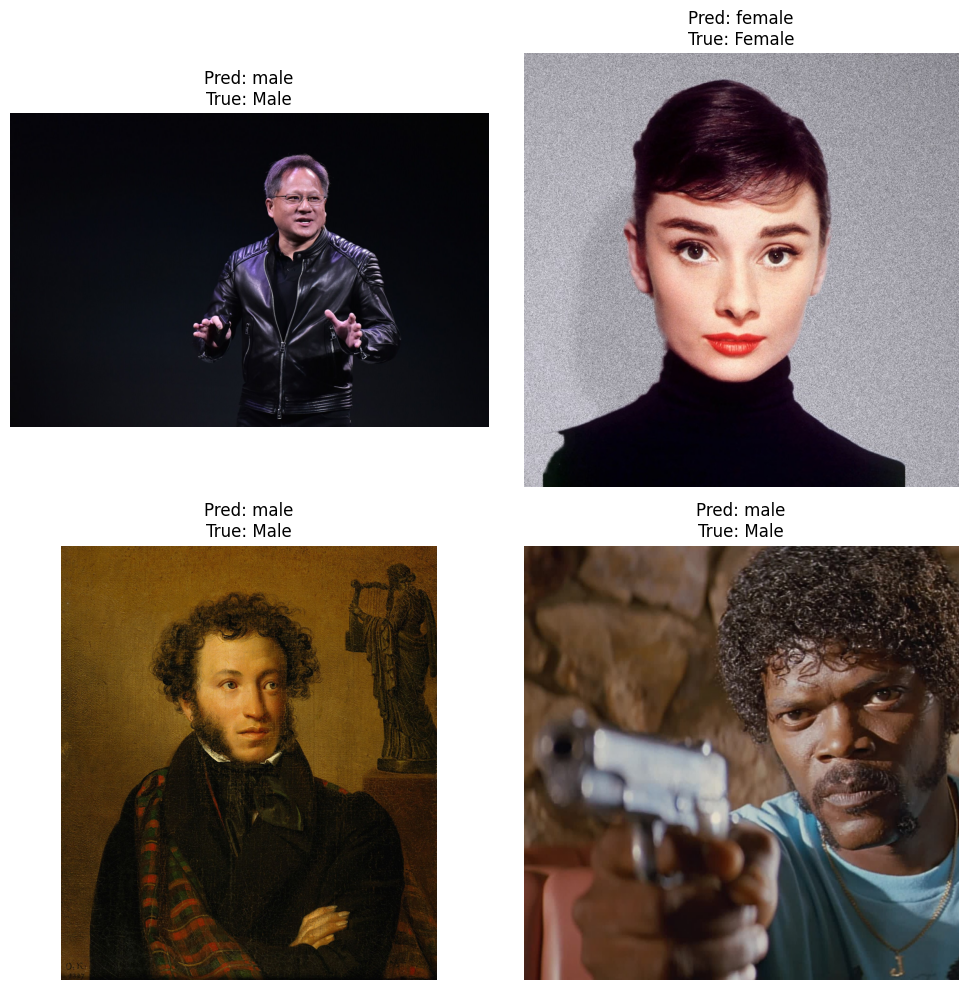

In [3]:
def predict_gender(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    return model.config.id2label[predicted_class_idx]

image_paths = [
    "C:\\Users\\Danya\\Pictures\\person_1.jpg",
    "C:\\Users\\Danya\\Pictures\\person_2.jpg",
    "C:\\Users\\Danya\\Pictures\\person_3.jpg",
    "C:\\Users\\Danya\\Pictures\\person_4.jpg"
]

true_labels = ["Male", "Female", "Male", "Male"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, image_path in enumerate(image_paths):
    predicted_label = predict_gender(image_path)
    true_label = true_labels[idx]

    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].axis('off')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}")

plt.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Среди предобученных моделей найдите модель для генерации аудио по тексту. Используя [данный сервис](https://geek-jokes.sameerkumar.website/api?format=json), получите текст случайной шутки. Сгенерируйте аудио с озвучкой данной шутки.

Для прослушивания полученного аудио воспользуйтесь встроенным виджетом `IPython.display.Audio`

- [ ] Проверено на семинаре

In [ ]:
import requests
import torch as th
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, SpeechT5HifiGan
from datasets import load_dataset
from IPython.display import Audio

In [6]:
response = requests.get("https://geek-jokes.sameerkumar.website/api?format=json")
joke = response.json()["joke"]
print(f"Joke: {joke}")

Joke: Chuck Norris just says 'no' to drugs. If he said 'yes', it would collapse Colombia's infrastructure.


In [ ]:
processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = th.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

inputs = processor(text=joke, return_tensors="pt")
speech = model.generate_speech(inputs["input_ids"], speaker_embedding, vocoder=vocoder)

Audio(speech, rate=16000)

<p class="task" id="4"></p>

4\. Разработайте решение для поиска ответа на голосовой вопрос по тексту, используя готовые модели `transformers`. Решение должно включать себя следующие модели:
- модель распознавания текста из аудио;
- модель поиска ответа на вопрос в тексте;
- модель генерации аудио по тексту.

В качестве входных данных запишите небольшой аудиофрагмент в формате на русском языке. Для записи вы можете воспользоваться любым устройством: мобильным телефоном, веб-приложением (например, [этим](https://vocalremover.org/ru/voice-recorder)) и т.д.

В качестве контекста для поиска ответа используйте предложенный текст.

Продемонстируйте все промежуточные результаты, полученные в процессе работы конвейера моделей.

- [ ] Проверено на семинаре

In [1]:
import torch as th
from transformers import pipeline, WhisperProcessor, WhisperForConditionalGeneration
from IPython.display import Audio
import soundfile as sf
import torchaudio

In [2]:
text = """
Машинное обучение — это раздел искусственного интеллекта, который позволяет компьютерным системам улучшать свою работу на основе опыта без явного программирования.
Основная идея заключается в том, что алгоритмы могут учиться на данных, выявляя закономерности и принимая решения с минимальным вмешательством человека.
Существует несколько типов машинного обучения: обучение с учителем, где алгоритм учится на размеченных данных; обучение без учителя, работающее с неразмеченными данными;
и обучение с подкреплением, где алгоритм учится через взаимодействие с окружающей средой.
"""
question = 'Какие типы машинного обучения существуют?'

In [3]:
Audio('question.mp3')

In [4]:
model = pipeline('automatic-speech-recognition', model='openai/whisper-tiny')
outputs = model('question.mp3')
question = outputs.get('text', '').strip()
question

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\whisper\generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


'Какие типы машинного обучения существуют?'

In [5]:
file_path = "question.mp3"

with open(file_path, "rb") as f:
    audio_data = f.read()

Audio(audio_data)

In [6]:
answerer = pipeline(
    "question-answering",
    model="timpal0l/mdeberta-v3-base-squad2",
    max_answer_len=512,
    device=0
)
answer = answerer(question=question, context=text)['answer']
answer

' обучение с учителем, где алгоритм учится на размеченных данных; обучение без учителя, работающее с неразмеченными данными;\nи обучение с подкреплением, где алгоритм учится через взаимодействие с окружающей средой.'

In [7]:
tts_model = pipeline('text-to-speech', model='suno/bark-small', device=0)
outputs = tts_model(answer)
audio = Audio(outputs.get('audio'), rate=outputs.get('sampling_rate'))
audio

c:\Users\Danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\encodec\modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
